### Notebook for the final reference map preparation

- **Developed by:** Anna Maguza
- **Institute of Computational Biology - Computational Health Department - Helmholtz Munich**
- 3rd March 2023

### Import required modules

In [1]:
import anndata
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import scanpy as sc

### Set up working environment

In [3]:
%matplotlib inline

In [4]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.4.0
asttokens                   NA
backcall                    0.2.0
cffi                        1.15.0
comm                        0.1.2
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.3
h5py                        3.8.0
igraph                      0.10.4
ipykernel                   6.19.2
ipython_genutils            0.2.0
jedi                        0.18.1
joblib                      1.2.0
jupyter_server              1.23.5
kiwisolver                  1.4.4
leidenalg                   0.9.1
llvmlite                    0.39.1
matplotlib                  3.6.3
matplotlib_inline           0.1.6
mpl_toolkits                NA
natsort                     8.2.0
numba                       0.56.4
num

### Upload data

In [ ]:
#Upload epithelial cells
input_file_epi = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/Epithelial_cells/scANVI/HVG_3000/Epithelial_cells_after_scanvi_3K_HVG.h5ad'
output_file_epi = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/Epithelial_cells/scANVI/HVG_3000/Epithelial_cells_after_scanvi_3K_HVG_output.h5ad'
epithelial = sc.read_h5ad(input_file_epi)

In [ ]:
#Upload mesenchymal cells
input_file_mes = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/Mesenchymal_cells/scANVI/Mesenchymal_cells_after_scanvi.h5ad'
output_file_mes = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/Mesenchymal_cells/scANVI/Mesenchymal_cells_after_scanvi_output.h5ad'
mesenchymal = sc.read_h5ad(input_file_mes)

In [68]:
#Upload other cells
# Downloading the data
input = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/GCA_and_StemCells_initial/Reference_map_(Gut_cell_atlas+Smilie+Wang).h5ad'
output = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/GCA_and_StemCells_initial/Reference_map_(Gut_cell_atlas+Smilie+Wang)_output.h5ad'
andata = sc.read_h5ad(input)

### Columns renaming

In [69]:
#Make cell_id as a column
epithelial.obs['cell_id'] = epithelial.obs.index
mesenchymal.obs['cell_id'] = mesenchymal.obs.index

#Split epithelial.obs['cell_id'] into two columns with '-reference' or '-query' as a separators
epithelial.obs[['cell_id', 'cell_id_2']] = epithelial.obs['cell_id'].str.split('-reference', expand = True)
mesenchymal.obs[['cell_id', 'cell_id_2']] = mesenchymal.obs['cell_id'].str.split('-reference', expand = True)

epithelial.obs[['cell_id', 'cell_id_2']] = epithelial.obs['cell_id'].str.split('-query', expand = True)
mesenchymal.obs[['cell_id', 'cell_id_2']] = mesenchymal.obs['cell_id'].str.split('-query', expand = True)

#Make cell_id as an index
epithelial.obs.set_index('cell_id', inplace = True)
mesenchymal.obs.set_index('cell_id', inplace = True)

In [70]:
#Delete unnecessary columns
epithelial.obs.drop('cell_id_2', axis = 1, inplace = True)
mesenchymal.obs.drop('cell_id_2', axis = 1, inplace = True)
epithelial.obs.drop('seed_labels', axis = 1, inplace = True)
mesenchymal.obs.drop('seed_labels', axis = 1, inplace = True)

In [71]:
# Make index as categorical
epithelial.obs.index = epithelial.obs.index.astype('category')
mesenchymal.obs.index = mesenchymal.obs.index.astype('category')
andata.obs.index = andata.obs.index.astype('category')


In [73]:
mesenchymal.obs

,UniqueCell_ID,Sample_ID,CellType,Study_name,Donor_ID,Diagnosis,Age,Region code,Fraction,Gender,...,total_counts_ribo,Location,n_counts,percent_mito,percent_ribo,Cell States,dataset,_scvi_batch,_scvi_labels,C_scANVI
cell_id,,,,,,,,,,,,,,,,,,,,,
AACACGTTCTTGCATT_Ileum-1_Stem Cell,AACACGTTCTTGCATT_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,Wang_Donor_1,Healthy adult,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,Stem_Cells_ext,reference,63,12,Stem_Cells_ext
AACCGCGCATGAAGTA_Ileum-1_Stem Cell,AACCGCGCATGAAGTA_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,Wang_Donor_1,Healthy adult,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,Stem_Cells_ext,reference,63,12,Stem_Cells_ext
AACTCAGAGCGATCCC_Ileum-1_Stem Cell,AACTCAGAGCGATCCC_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,Wang_Donor_1,Healthy adult,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,Stem_Cells_ext,reference,63,12,Stem_Cells_ext
AACTCCCTCTCAACTT_Ileum-1_Stem Cell,AACTCCCTCTCAACTT_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,Wang_Donor_1,Healthy adult,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,Stem_Cells_ext,reference,63,12,Stem_Cells_ext
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell,AACTCTTAGCTTCGCG_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,Wang_Donor_1,Healthy adult,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,Stem_Cells_ext,reference,63,12,Stem_Cells_ext
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAAATGAAGTCCATAC-1-WTDAtest7770719,nan,A30-SCL-6-SC-45N-2,Mesenchymal,Gut Cell Atlas,A30 (398B),Healthy adult,20-25,SCL,SC-45N,F,...,313.0,LargeInt,1707.0,1.5794982,18.336262,Stromal 3 (C7+),query,1,28,Stromal 3 (C7+)
GAACGGATCGAGAGCA-1-WTDAtest7770719,nan,A30-SCL-6-SC-45N-2,Mesenchymal,Gut Cell Atlas,A30 (398B),Healthy adult,20-25,SCL,SC-45N,F,...,684.0,LargeInt,4469.0,1.5952239,15.305437,Stromal 3 (C7+),query,1,28,Stromal 3 (C7+)
GTCGGGTAGACTCGGA-1-WTDAtest7770719,nan,A30-SCL-6-SC-45N-2,Mesenchymal,Gut Cell Atlas,A30 (398B),Healthy adult,20-25,SCL,SC-45N,F,...,583.0,LargeInt,3151.0,2.3779778,18.502062,Stromal 3 (C7+),query,1,28,Stromal 3 (C7+)


In [74]:
#Delete Stem Cell from the mesenchymal cells
mesenchymal = mesenchymal[mesenchymal.obs['CellType'] != 'Stem Cell']

In [75]:
# Concatenate the epithelial and mesenchymal cells
epi_mes = anndata.concat([epithelial, mesenchymal], join = 'outer', index_unique = None)

In [81]:
# Create a dictionary to map barcodes to cell labels
barcode_to_label = {}

# Transfer cell labels from 'epi_mes'
for barcode, label in zip(epi_mes.obs.index, epi_mes.obs['C_scANVI']):
    barcode_to_label[barcode] = label

# Transfer cell labels from 'all_cells' where there are NA values
for barcode, label in zip(andata.obs.index, andata.obs['Cell States']):
    if barcode not in barcode_to_label or pd.isna(barcode_to_label[barcode]):
        barcode_to_label[barcode] = label

In [82]:
# Create a new column in 'all_cells' with the transferred cell labels
andata.obs['Cell Label'] = [barcode_to_label.get(barcode, None) for barcode in andata.obs.index]

In [86]:
andata.obs

,UniqueCell_ID,Sample_ID,CellType,Study_name,Donor_ID,Diagnosis,Age,Region code,Fraction,Gender,...,doublet_scores,predicted_doublets,Age_group,total_counts_ribo,Location,n_counts,percent_mito,percent_ribo,Cell States,Cell Label
cell_id,,,,,,,,,,,,,,,,,,,,,
AACACGTTCTTGCATT_Ileum-1_Stem Cell,AACACGTTCTTGCATT_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,Wang_Donor_1,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,Stem_Cells_ext,Stem_Cells_ext
AACCGCGCATGAAGTA_Ileum-1_Stem Cell,AACCGCGCATGAAGTA_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,Wang_Donor_1,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,Stem_Cells_ext,Stem_Cells_ext
AACTCAGAGCGATCCC_Ileum-1_Stem Cell,AACTCAGAGCGATCCC_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,Wang_Donor_1,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,Stem_Cells_ext,Stem_Cells_ext
AACTCCCTCTCAACTT_Ileum-1_Stem Cell,AACTCCCTCTCAACTT_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,Wang_Donor_1,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,Stem_Cells_ext,Stem_Cells_ext
AACTCTTAGCTTCGCG_Ileum-1_Stem Cell,AACTCTTAGCTTCGCG_Ileum-1_Stem Cell,Ileum-1,Stem Cell,Wang,Wang_Donor_1,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,Stem_Cells_ext,Stem_Cells_ext
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N110.LPA.TCGGGACGTCAACTGT,nan,N110.LPA,Stem Cell,Smilie,N110,Non-inflamed,nan,nan,nan,nan,...,nan,nan,nan,nan,LP,4384,nan,nan,Stem_Cells_ext,Stem_Cells_ext
N110.LPA.TGAGCATTCCAGTAGT,nan,N110.LPA,Stem Cell,Smilie,N110,Non-inflamed,nan,nan,nan,nan,...,nan,nan,nan,nan,LP,15655,nan,nan,Stem_Cells_ext,Stem_Cells_ext
N110.LPA.TGGCCAGAGAGGACGG,nan,N110.LPA,Stem Cell,Smilie,N110,Non-inflamed,nan,nan,nan,nan,...,nan,nan,nan,nan,LP,26921,nan,nan,Stem_Cells_ext,Stem_Cells_ext


In [87]:
#Write the file
andata.write_h5ad('/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/All_cell_types/All_cell_types_after_scanvi.h5ad')

### Reference Object Description

In [5]:
# Data upload
input = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/All_cell_types/All_cell_types_after_scanvi.h5ad'
output = '/lustre/groups/talaveralopez/workspace/anna.maguza/Processed_datasets/Reference_maps/GCA_Stem_cells/All_cell_types/All_cell_types_after_scanvi_output.h5ad'
andata = sc.read_h5ad(input)

/home/icb/anna.maguza/miniconda3/envs/scarches_env/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [6]:
andata

AnnData object with n_obs × n_vars = 375293 × 40144
    obs: 'UniqueCell_ID', 'Sample_ID', 'CellType', 'Study_name', 'Donor_ID', 'Diagnosis', 'Age', 'Region code', 'Fraction', 'Gender', '10X', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts_mt', 'doublet_scores', 'predicted_doublets', 'Age_group', 'total_counts_ribo', 'Location', 'n_counts', 'percent_mito', 'percent_ribo', 'Cell States', 'Cell Label'

In [9]:
df = andata.obs['Cell Label'].value_counts()

In [10]:
# Make a column with 'TRUE' if the cell is Stem Cell in the 'Cell Label' column
andata.obs['Stem Cell'] = andata.obs['Cell Label'] == 'Stem_Cells_ext'

In [12]:
sc.pp.neighbors(andata, n_neighbors = 50, n_pcs=40)
sc.tl.umap(andata, min_dist = 0.2, spread = 2, random_state = 1712)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:04:26)


/home/icb/anna.maguza/miniconda3/envs/scarches_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:07:20)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:12:38)


/home/icb/anna.maguza/miniconda3/envs/scarches_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


TypeError: The numpy boolean negative, the `-` operator, is not supported, use the `~` operator or the logical_not function instead.

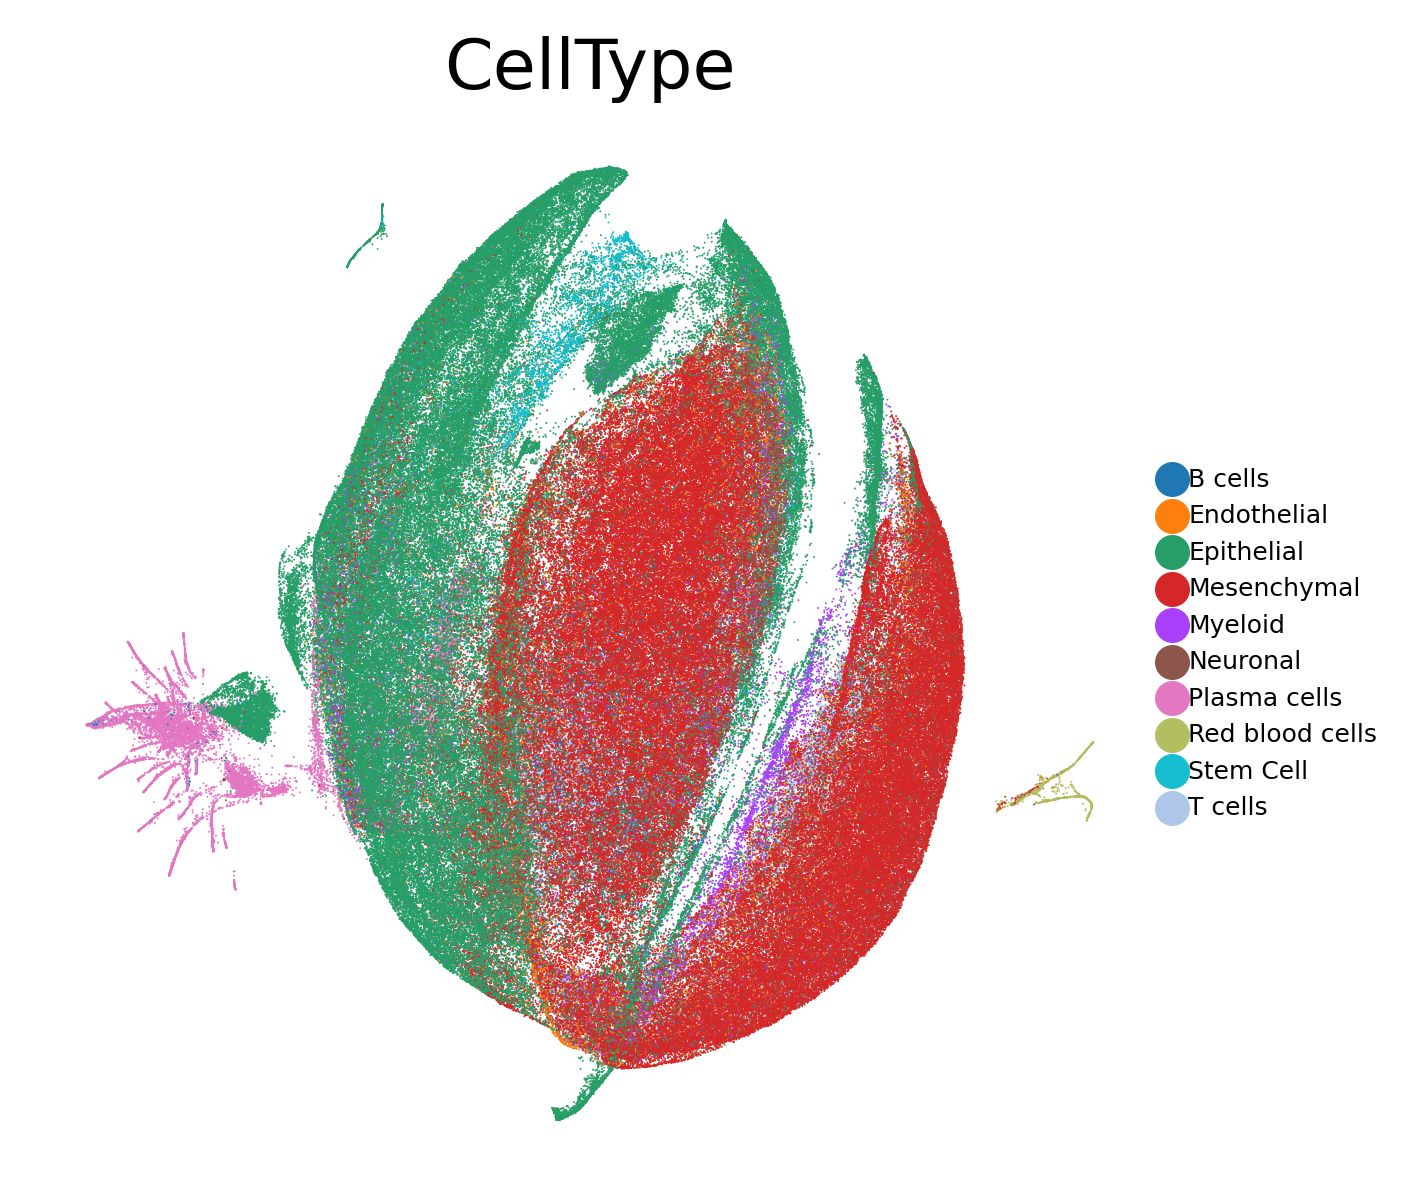

In [13]:
sc.pl.umap(andata, frameon = False, color = ['CellType', 'Stem Cell', 'Diagnosis', 'Study_name', 'Cell Label'], size = 0.6, legend_fontsize = 5, ncols = 3)